In [2]:
import pandas as pd

#데이터 로드
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
train_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      71 non-null     int64  
 1   년식      71 non-null     int64  
 2   종류      71 non-null     object 
 3   연비      71 non-null     float64
 4   마력      71 non-null     int64  
 5   토크      71 non-null     float64
 6   연료      71 non-null     object 
 7   하이브리드   71 non-null     int64  
 8   배기량     71 non-null     int64  
 9   중량      71 non-null     int64  
 10  변속기     71 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 6.2+ KB


In [6]:
train_df.describe()

,가격,년식,연비,마력,토크,하이브리드,배기량,중량
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2488.492958,2014.436620,12.361972,175.647887,29.443662,0.042254,2152.450704,1580.563380
std,1456.797632,1.167811,3.154333,61.207165,12.143943,0.202599,687.918699,367.027859
min,1104.000000,2011.000000,6.300000,100.000000,13.600000,0.000000,1368.000000,1035.000000
25%,1620.000000,2015.000000,9.950000,136.000000,18.150000,0.000000,1591.000000,1261.000000
50%,2110.000000,2015.000000,12.400000,166.000000,27.000000,0.000000,1999.000000,1615.000000
75%,3044.500000,2015.000000,14.200000,200.000000,41.000000,0.000000,2428.000000,1903.000000
max,11150.000000,2015.000000,19.000000,416.000000,52.000000,1.000000,5038.000000,2210.000000


## EDA

In [3]:
import pandas as pd
import sweetviz as sv

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')
sv.config_parser.read_string("[General]\nuse_cjk_font=1")

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

compare_report = sv.compare([df_train,'Train'],[df_test,'Test'],target_feat='가격')
compare_report.show_html(r'./image/EDA_Report.html')

c:\Dev_mulcam1\1.머신러닝\00.EDA툴\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)  


Report ./image/EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


```
1.결측치 : 없음
2.중복값 : train 1, test 0
3.이상치 : 가격 -> 적은 수이므로 잠정적으로 수용하는 것으로 판다.
4.인코딩: 종류,연료,변속기(문자), 년식, 하이브리드(숫자이기는 하나, 범주형)
5.F&L관계성유무: heatmap분석: 관계성이 있음-> 학습은 가능할 듯!!!
6.스케일링:아직 모름
```

In [16]:
#가공: 중복값 처리

train_df[train_df.duplicated()]


,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
16,1960,2015,대형,11.4,175,46.0,디젤,0,2497,1990,수동


In [17]:
len(train_df)#중복제거 전

71

In [19]:
train_df = train_df.drop_duplicates()

In [21]:
len(train_df)#중복제거 후

70

In [24]:
# 1차 가공 후 데이터 저장

train_df.to_csv('./data/train_pre.csv',index=False) #인덱스 빼고 저장

In [25]:
pd.read_csv('./data/train_pre.csv')

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
65,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
66,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
67,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
68,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


<Axes: >

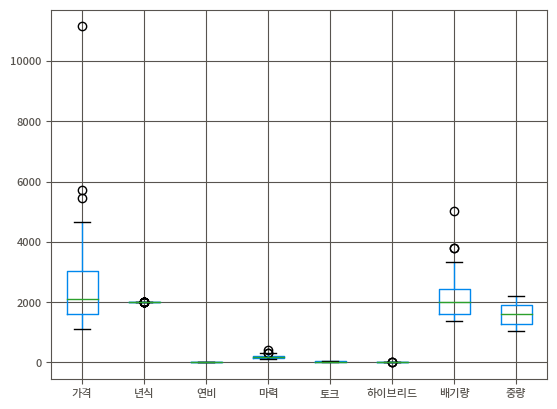

In [11]:
train_df.boxplot()

<Axes: >

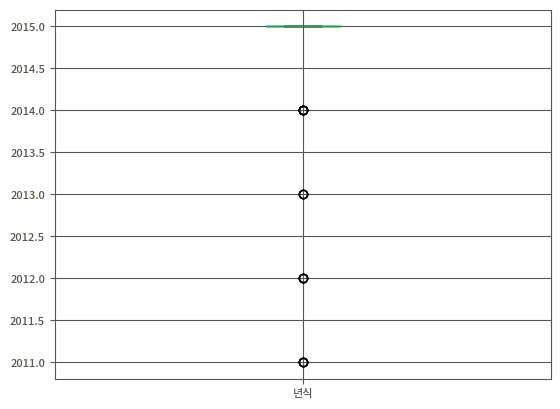

In [12]:
train_df[['년식']].boxplot() ## 범주형이여서 boxplot으로 분석하는 의미가 없음.

<Axes: >

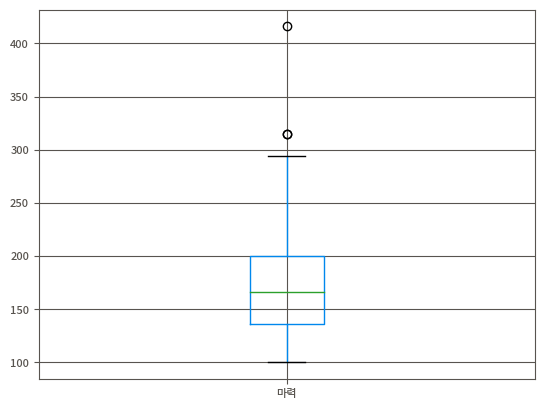

In [13]:
train_df[['마력']].boxplot() #요정도 갯수면, 수용하자~~~~

<Axes: >

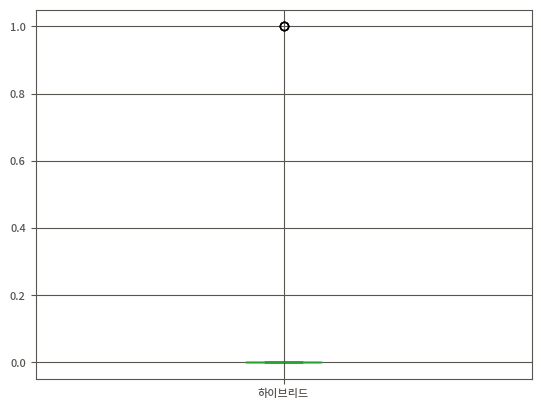

In [14]:
train_df[['하이브리드']].boxplot()  #범주형 데이터여서 분석 의미 없겠다. 